### Here are presented 4 examples of how apply Linear Fits to data, including the calculation of statistical errors

This methods are used for the students of the course of Introduction to Nuclear Physics in order to analyse data taken from the experiments
After a Gaussian Fit we know the elements we want to fit
### Getting the calibration curve knowing the gamma energies from Cobalt-60 and Cesium-137
$\gamma$(Cs-137) = 661.66 keV, $\gamma_{1}$(Co-60) = 1137.2 keV, $\gamma_{2}$(Co-60) = 1332.5 keV

Mean Channel: 1007.96, 1809.33, 2050.01
|Canal|Energy(keV)|
|----|----|
| 1007.96 | 661.66 |
| 1809.33 | 1137.2 |
| 2050.01 | 1332.5 |

### 1. Linear Regresion using __numpy.polyfit__ function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
channel = np.array([1007.96, 1809.33, 2050.01])
energy = np.array([661.66, 1137.2, 1332.5])

In [3]:
par, cov_matrix = np.polyfit(channel, energy, 1, cov=True)
error = np.sqrt(np.diag(cov_matrix))

print(f"Slope: {par[0]:.2f} +- {error[0]:.2f}")
print(f"Intercept: {par[1]:.2f} +- {error[1]:.2f}")

Slope: 0.63 +- 0.04
Intercept: 19.87 +- 68.62


El coeficiente de determinación $R^{2} = [Cor(Y,X)]^{2}$,     donde $Cor(Y,X)=\frac{Cov(Y,X)}{\sqrt(Cov(X,X)Cov(Y,Y))}$

In [4]:
def r_squared(x,y):
    return np.corrcoef(x,y)[0, 1]**2

#cor_matrix = np.corrcoef(channel, energy)
#print(cor_matrix[0,1].round(3))
print(f"R-squared: {r_squared(channel, energy):.4f}")

R-squared: 0.9958


In [5]:
from sklearn.metrics import r2_score 
R_square = r2_score(energy, channel * par[0] + par[1]) 
print('Coefficient of Determination:', R_square.round(4)) 

Coefficient of Determination: 0.9958


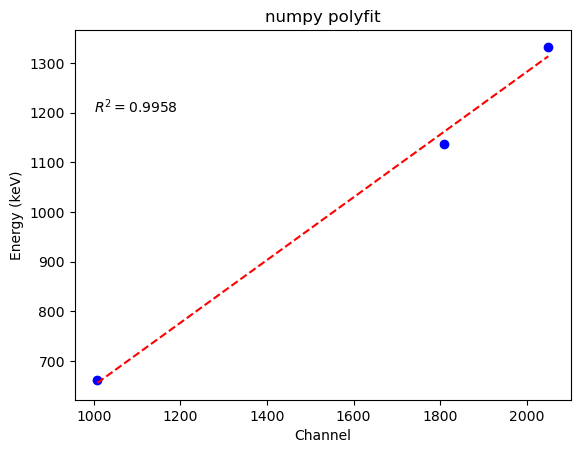

In [6]:
x = np.linspace(channel.min(),channel.max(),1000)
fig, ax = plt.subplots()
ax.plot(channel, energy, c = 'b', marker="o", ls="")
ax.plot(x, x * par[0] + par[1], c = 'r', ls="--")
ax.text(1000,1200,f"$R^{2}=${R_square.round(4)}")
plt.ylabel(r'Energy (keV)')
plt.xlabel(r'Channel')
plt.title(r"numpy polyfit")
plt.show()

### 2. Linear Regresion using __curve_fit__ from scipy

In [7]:
from scipy.optimize import curve_fit

In [8]:
# user defined function
def model_f(x,m,n):
    return m * x + n

In [9]:
init_values = [1,1]
params, cov_m = curve_fit(model_f, channel, energy, p0 = init_values)

Reportando las incertidumbres y el coeficiente de determinación

In [10]:
err = np.sqrt(np.diag(cov_m))

print(f"Slope: {par[0]:.2f} +- {err[0]:.2f}")
print(f"Intercept: {par[1]:.2f} +- {err[1]:.2f}")

Slope: 0.63 +- 0.04
Intercept: 19.87 +- 68.62


El coeficiente de determinación $R^{2}$ se relaciona con los siguientes de términos de la siguente forma:  
$R^{2} =1 - \frac{SSE}{SST}$  
donde:  
* Sum of squared Residuals $SSE = (y_{i}-\^y)^2$
* Total sum of squared deviation $SST = (y_{i}-\=y)^2$


In [11]:
energy_fit = channel * par[0] + par[1]
sse = sum((energy - energy_fit) ** 2)
sst = sum((energy - np.average(energy)) ** 2)
#sst = len(energy) * np.var(energy)
r_squared = 1 - sse/sst
print(sse,sst)
print("R_squared: ",r_squared.round(4))

990.2574524904531 238102.22906666668
R_squared:  0.9958


Otro método para conocer $R^{2}$ es utilizando la función __linregress__ de scipy.stats

In [12]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(channel, energy)
print(f"R-squared: {r_value ** 2:.4f}")

R-squared: 0.9958


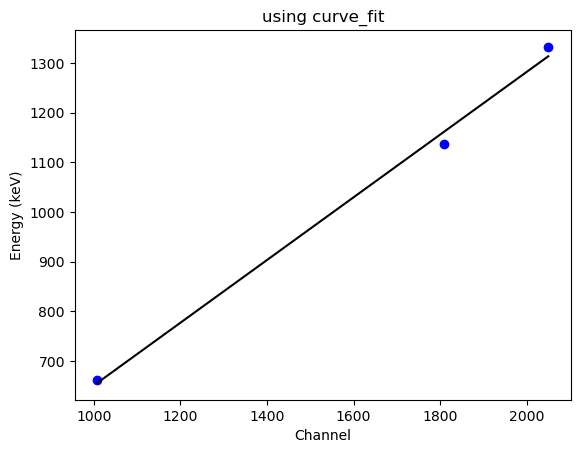

In [13]:
x = np.linspace(channel.min(),channel.max(),1000)

plt.plot(channel, energy,c='b', marker='o',ls="")
plt.plot(x, x * par[0] + par[1], 'k-')
plt.ylabel(r'Energy (keV)')
plt.xlabel(r'Channel')
plt.title(r"using curve_fit")
plt.show()

### 3. Linear Regresion using Machine learning (librería sklearn)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [15]:
# Model
model = LinearRegression()
type(model)
channel_train = channel.reshape(-1,1)
energy_train = energy.reshape(-1,1)
model.fit(channel_train, energy_train)

# Print parameters
print(f"intercepto (n): {model.intercept_}")
print(f"pendiente (m): {model.coef_}")
r_sq = r2_score(energy_train, channel_train * model.coef_ + model.intercept_)
print(f"R-squared (m): {r_sq:.4f}")

intercepto (n): [19.86944909]
pendiente (m): [[0.63109972]]
R-squared (m): 0.9958


#### Podemos concluir que cada método arroja el mismo resultado de los parámetros y sus errores calculado por diferentes vías.

### 4. Otro método es utilizar la librería __statmodels__ OLS(Ordinary Least Squares)

La bibliografía a esta librería se puede consultar [aquí](https://www.statsmodels.org/stable/index.html)

** se necesitan al menos 8 coordenadas para que el modelo funcione correctamente

In [16]:
import statsmodels.api as sm  # for load inner datasets and artificail data
import statsmodels.formula.api as smf  # for datadrames

### As a bibliography was used the standards libraries and the following books
+ Regression Analysis by Example, Wiley Series
+ Practical Statistics for Data Scientist, O'Reilly